In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('data/clean_df.csv')

In [3]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [4]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
date,,,,,,,,,,,,,,,,,,
2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [6]:
df = pd.get_dummies(df, columns=['district', 'main_category', 'sub_category', 'time_of_day', 'confirmed_time'])

In [7]:
df.head()

,incident_id,governorate,area,target,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,...,confirmed_time_23,confirmed_time_24,confirmed_time_3,confirmed_time_4,confirmed_time_5,confirmed_time_6,confirmed_time_7,confirmed_time_8,confirmed_time_9,confirmed_time_Unknown
date,,,,,,,,,,,,,,,,,,,,,
2015-03-26,1,Sanaa,Al-Rahabah,Al-Daylami Airbase,1,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,2,Sanaa,Airport,Sana'a International Airport,1,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,3,Sanaa,Al-Sonblah Neighbourhood,Residential Area,1,2.0,29,21,3,14,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,4,Sanaa,Al-Nahdain,Presidential Palace,1,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2015-03-26,5,Sanaa,Al-Nahdhah,Former 1st Armoured Division,1,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
len(df['governorate'].unique())

22

In [9]:
df['label'] = pd.Categorical(df['governorate'])

In [10]:
df['label'] = df['label'].cat.codes

In [11]:
df['label']

date
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
              ..
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    14
Name: label, Length: 22485, dtype: int8

In [12]:
X = df.drop(columns=['area', 'target', 'governorate'])
y = df['label']

In [13]:
y

date
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
              ..
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    18
2020-12-31    14
Name: label, Length: 22485, dtype: int8

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, shuffle=False)

In [15]:
y_train

date
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
2015-03-26    18
              ..
2018-03-30    17
2018-03-30    20
2018-03-31     3
2018-03-31     3
2018-03-31     7
Name: label, Length: 16863, dtype: int8

In [16]:
y_train = to_categorical(y_train, num_classes=22)
y_test = to_categorical(y_test, num_classes=22)

In [17]:
y_train.shape

(16863, 22)

In [18]:
y_test.shape

(5622, 22)

In [19]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [20]:
input_shape = X_train_ss[0].shape

In [21]:
model = Sequential()

model.add(Dense(128, input_shape=(375,), activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(32, activation='relu'))

model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=10, batch_size = 512)

Epoch 1/10
33/33 [==============================] - 1s 27ms/step - loss: 2.7668 - acc: 0.2629 - val_loss: 1.6573 - val_acc: 0.5770
Epoch 2/10
33/33 [==============================] - 0s 5ms/step - loss: 1.0873 - acc: 0.7889 - val_loss: 0.3304 - val_acc: 0.9289
Epoch 3/10
33/33 [==============================] - 0s 5ms/step - loss: 0.2028 - acc: 0.9727 - val_loss: 0.1673 - val_acc: 0.9532
Epoch 4/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0650 - acc: 0.9885 - val_loss: 0.1523 - val_acc: 0.9562
Epoch 5/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0367 - acc: 0.9925 - val_loss: 0.1524 - val_acc: 0.9566
Epoch 6/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0295 - acc: 0.9933 - val_loss: 0.1567 - val_acc: 0.9573
Epoch 7/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0204 - acc: 0.9955 - val_loss: 0.1671 - val_acc: 0.9587
Epoch 8/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0211 - acc: 0.9

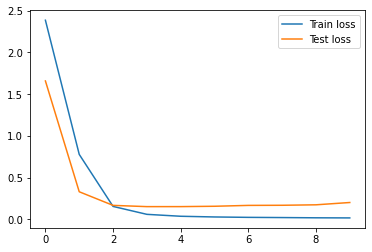

In [22]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

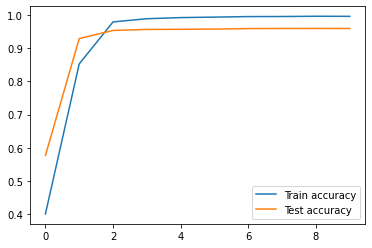

In [23]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();